 # 9.3. Keras

----

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams["font.size"]= 15

import pandas as pd
import seaborn as sns
import numpy as np

# Import the practice dataset
from sklearn.datasets import make_moons



In [2]:
X,y = make_moons(n_samples=500, noise=0.2, random_state=42)

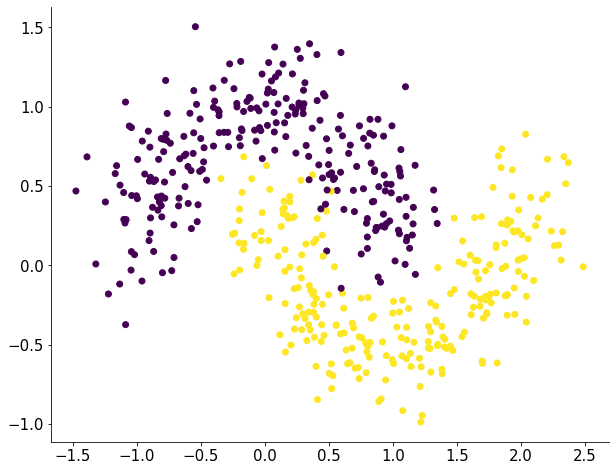

In [3]:
plt.scatter(X[:,0], X[:,1], c = y);
sns.despine()

In [4]:
X

array([[ 8.30857788e-01, -3.34342282e-01],
       [ 9.91709551e-01,  8.78999659e-01],
       [ 1.10724530e+00, -4.70343756e-01],
       [-1.40899180e-01,  1.03314844e+00],
       [ 4.05592166e-01,  1.32852876e+00],
       [ 1.28895069e+00, -5.24079834e-01],
       [ 1.12079473e+00, -2.72254126e-01],
       [ 1.06593729e-01,  1.21210782e+00],
       [ 5.20198504e-01,  5.82883348e-01],
       [ 1.70590095e+00, -3.33066121e-01],
       [ 1.01561986e+00,  2.73026004e-02],
       [-5.22698706e-01,  3.81315376e-01],
       [ 1.69803483e+00, -6.18298670e-01],
       [ 2.41387822e-01,  7.07334462e-01],
       [ 1.34611143e+00, -5.07042180e-01],
       [ 1.27539204e+00, -5.22307686e-01],
       [ 1.98071107e+00,  3.48378058e-01],
       [ 9.39366864e-01,  4.68451809e-01],
       [ 6.62788578e-01, -6.14652226e-01],
       [ 1.73235560e+00, -3.06407313e-01],
       [ 1.92000739e+00,  2.77147626e-01],
       [ 2.20364555e+00,  4.45032301e-01],
       [-2.36031096e-01,  2.03082090e-01],
       [ 9.

----

# 1. Introduction to Keras library
+ High-level Deep Learning API allowing to easily build, train, evaluate and execute artificial neural networks(documentation at https://keras.io/)
+ run on top of tensorflow:
+ It is written in Cuda (a parallel computing platform working on GPUs) and C++ for performance. 

## Train a model in 3 steps

1. **configure a model, give**:
    + architecture
    + number of neurons
    + layers
    + type of activation functions
2. **compile the model, give**:
    + optimizers (algorithm that finds the minimum of the loss function)
    + loss function (the loss function to be optimized; we choose the loss function depending on the problem we are solving)
    + metrics (metrics to be tracked over training)
3. **fitting the model, give**:
    + epochs (number of iterations of the dataset in training)
    + batch size (the data is fed in batches; not all data at once)
    + Determines which fraction of the data is used as a validation set

----

### 1. Configure a model
Let's build feed-forward network we looked yesterday
![](FFNN.jpeg)

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
# model for NN composed of stack of layers connected sequentially (Feed Forward Network)
from tensorflow.keras import backend as K

2022-03-07 21:08:04.431131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 21:08:04.431154: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
# clear keras backend session to have a clean start when defining your model
K.clear_session()

In [7]:
# Understand the input shape of each single entry in X (number of features)
X[0].shape

(2,)

In [8]:
# Instantiate an object of the class Sequential
model = Sequential()

2022-03-07 21:08:07.003750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-07 21:08:07.003984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 21:08:07.004069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-07 21:08:07.004163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-07 21:08:07.004229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
K.clear_session()

# Instantiate an object of the class Sequential
model = Sequential([
    # 1st layer (Hidden layer)
    keras.layers.Dense(units=2, input_shape=(2,), 
                       activation=keras.activations.sigmoid),
    
    # 2nd layer (Output layer)
    keras.layers.Dense(units=1, activation=keras.activations.sigmoid)
]
)

In [10]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [11]:
# See the randomly inizialized weigths and biases for each layer

In [12]:
hidden = model.get_layer('dense')

In [13]:
weigths_hid, biases_hid = hidden.get_weights()
weigths_hid.shape, biases_hid.shape

((2, 2), (2,))

In [14]:
weigths_hid

array([[0.47214377, 0.3229798 ],
       [0.45258057, 0.8073696 ]], dtype=float32)

In [15]:
biases_hid

array([0., 0.], dtype=float32)

In [16]:
output = model.get_layer('dense_1')

In [17]:
weigths_out, biases_out = output.get_weights()
weigths_out.shape, biases_out.shape

((2, 1), (1,))

In [18]:
weigths_out

array([[ 0.3879081 ],
       [-0.39375007]], dtype=float32)

In [19]:
biases_out

array([0.], dtype=float32)

### 2. Compile the model
Compiling the python code you wrote into lower-level C++ code for better performance.

In [20]:
model.compile(loss=keras.losses.binary_crossentropy,
             optimizer=keras.optimizers.SGD(learning_rate=0.3),
             metrics=['accuracy'])

### 3. Train the model

In [21]:
history = model.fit(X,y, epochs = 100, batch_size = 32, verbose = 1, validation_split=0.2)
# verbose: we want to see the output

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6806 - accuracy: 0.7350 - val_loss: 0.6835 - val_accuracy: 0.4500
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.6125 - val_loss: 0.6640 - val_accuracy: 0.7200
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.7775 - val_loss: 0.6384 - val_accuracy: 0.8300
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.8300 - val_loss: 0.6085 - val_accuracy: 0.8300
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.8150 - val_loss: 0.5743 - val_accuracy: 0.8400
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.8300 - val_loss: 0.5343 - val_accuracy: 0.8300
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8175 - val_loss: 0.5026 - val_accuracy: 0.8300
Epoch 8/100


The history object contains:
+ the training parameters (history.params) 
+ a dictionary (history.history) containing the loss and extra metrics measured at the end of each epoch

Text(0.5, 0, 'Epochs')

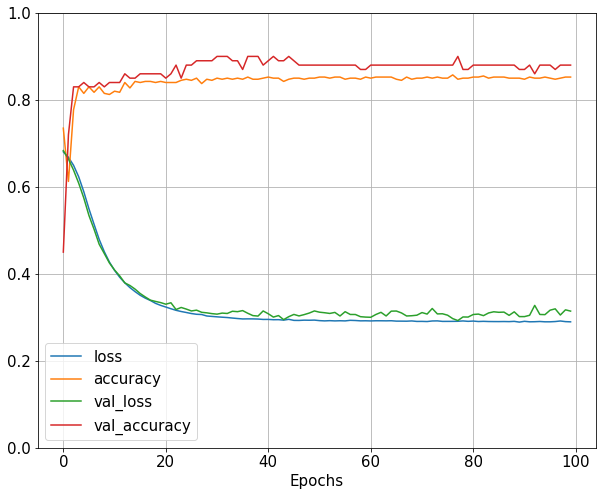

In [22]:
# Plotting 
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the y range to [0,1]
plt.xlabel('Epochs')

In [23]:
# Evaluate the model
model.evaluate(X, y)

16/16 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8580


[0.2935817539691925, 0.8579999804496765]

In [24]:
# Use the model to predict
predict= model.predict(X)
predict

array([[0.948507  ],
       [0.06768602],
       [0.97107244],
       [0.0274415 ],
       [0.02296165],
       [0.9766563 ],
       [0.9500431 ],
       [0.02391362],
       [0.12373853],
       [0.97181267],
       [0.82529074],
       [0.10332948],
       [0.9830587 ],
       [0.0654248 ],
       [0.9765271 ],
       [0.9764167 ],
       [0.7489649 ],
       [0.28060246],
       [0.9732059 ],
       [0.9704261 ],
       [0.80107105],
       [0.7026487 ],
       [0.2623428 ],
       [0.94983923],
       [0.13100857],
       [0.27301443],
       [0.7195761 ],
       [0.06881115],
       [0.02160007],
       [0.9321395 ],
       [0.92926395],
       [0.91249907],
       [0.959069  ],
       [0.03163099],
       [0.5483538 ],
       [0.97039664],
       [0.9645542 ],
       [0.07259411],
       [0.04381204],
       [0.05677068],
       [0.98275554],
       [0.03788313],
       [0.5097472 ],
       [0.08959267],
       [0.70268685],
       [0.05592495],
       [0.7828412 ],
       [0.475

### Inspect model parameters

In [25]:
hidden = model.get_layer('dense')
output = model.get_layer('dense_1')

In [26]:
weigths_hid, biases_hid = hidden.get_weights()
weigths_out, biases_out = output.get_weights()

In [27]:
weigths_hid, biases_hid

(array([[ 0.6448306 , -0.58663785],
        [-2.222398  ,  2.8036213 ]], dtype=float32),
 array([-0.09095373, -0.18610123], dtype=float32))

In [28]:
weigths_out, biases_out

(array([[ 3.99346  ],
        [-4.8078365]], dtype=float32),
 array([0.6533717], dtype=float32))

### Save the model

In [29]:
model.save("model_moons.h5")

### Load a model

In [30]:
from tensorflow.keras.models import load_model

In [31]:
moons_model = load_model("model_moons.h5")
moons_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


-----

### Practicing with Mnist dataset (handwritten digit images)

In [32]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

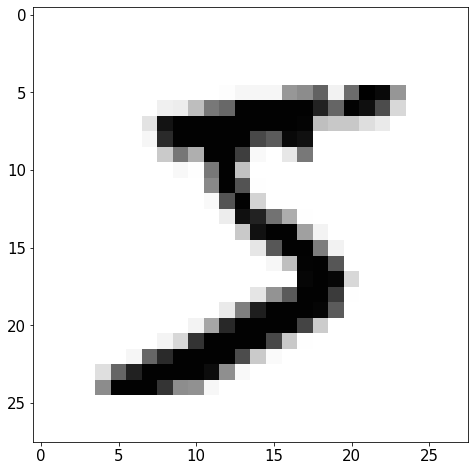

In [33]:
# Show the first image
plt.imshow(xtrain[0], cmap=plt.cm.Greys)

In [34]:
# Show the first y value
ytrain[0]

5

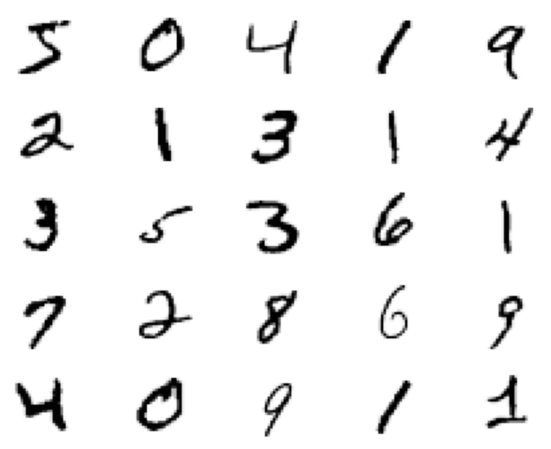

In [35]:
# Plot the first 25 digits
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [36]:
print('xtrain shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')
print(xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

xtrain shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape
ytrain shape: (60000,)


### Preprocessing

We want:

+ flatten xtrain and xtest
+ transform ytrain and ytest to categorical/dummies

In [37]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [38]:
# add new axis 
X_train = xtrain.reshape(60000, 784)
X_test = xtest.reshape(10000, 784)

In [39]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
print('X_train shape:', X_train.shape)
print(xtrain.shape, 'train samples')
print(xtest[0].shape, 'test samples')
print(X_train[0].shape, 'flatten image shape')
print('ytrain shape:', ytrain.shape)

X_train shape: (60000, 784)
(60000, 28, 28) train samples
(28, 28) test samples
(784,) flatten image shape
ytrain shape: (60000,)


In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [44]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
# define the model
K.clear_session()
mnistm = Sequential([
    keras.layers.Dense(units=10, activation=keras.activations.sigmoid, input_shape= X_train[0].shape), # 10 neurons in the hidden layer is arbitrary
     keras.layers.Dense(units=10, activation=keras.activations.softmax) # 10 neurons in the output layer because we have 10 classes /digits
])

In [46]:
# compile the model
mnistm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.3), loss=keras.losses.categorical_crossentropy, metrics=keras.metrics.Precision())

In [47]:
# fit the model 
mnistm.fit(X_train,y_train, epochs = 30, batch_size = 15, verbose = 1, validation_split=0.2)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 2.4686 - precision: 0.5504 - val_loss: 2.5215 - val_precision: 0.8571
Epoch 2/30
3200/3200 [==============================] - 5s 2ms/step - loss: 2.5040 - precision: 0.3500 - val_loss: 2.5466 - val_precision: 0.8571
Epoch 3/30
3200/3200 [==============================] - 4s 1ms/step - loss: 2.4993 - precision: 0.5357 - val_loss: 2.5777 - val_precision: 0.8571
Epoch 4/30
3200/3200 [==============================] - 4s 1ms/step - loss: 2.4984 - precision: 0.5714 - val_loss: 2.3686 - val_precision: 0.8571
Epoch 5/30
3200/3200 [==============================] - 4s 1ms/step - loss: 2.4968 - precision: 0.4186 - val_loss: 2.5200 - val_precision: 0.8571
Epoch 6/30
3200/3200 [==============================] - 4s 1ms/step - loss: 2.5014 - precision: 0.3276 - val_loss: 2.4523 - val_precision: 0.1429
Epoch 7/30
3200/3200 [==============================] - 4s 1ms/step - loss: 2.5013 - precision: 0.5000 - val_loss: 2.4261 - 

+ keras models api: https://keras.io/api/models/
+ keras layers api: https://keras.io/api/layers/
+ keras optimizer api: https://keras.io/api/optimizers/
+ keras metrics api: https://keras.io/api/metrics/
+ keras losses api: https://keras.io/api/losses/

* For nice model visualization uses https://www.tensorflow.org/tensorboard/get_started

In [48]:
----

SyntaxError: invalid syntax (2133496677.py, line 1)